### Tensorflow MNIST Example
In this example, we train a Tensorflow Neural Network to classify images using the MNIST image dataset, which consist of a collection of 70,000 grayscale images of handwritten numbers from 0 to 9, with each image having a size of 28X28 pixels .
- MNIST dataset: http://yann.lecun.com/exdb/mnist/ , https://www.tensorflow.org/datasets/catalog/mnist

###### >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>  Ricardo Marques Domingues [10/15/2020]

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from IPython import display

### Part-1: Loading the MNIST dataset

Here, we're already splitting into **train** and **test** subsets. 
With this call, the MNIST set of images also already comes shuffled.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# modifing pixels scale from 0-255 to 0-1
x_train, x_test = x_train/255.0, x_test/255.0

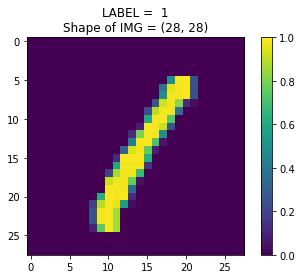

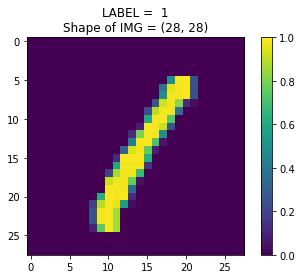

In [4]:
# This loop quickly displays the 2D 28 x 28 pixels training images, along with their Y labels
for i in range(4):#range(len(y_train))
    
    plt.clf()
    plt.imshow(np.squeeze(x_train[i,:,:]))
    plt.title('LABEL =  {}\nShape of IMG = {}'.format(y_train[i],np.squeeze(x_train[i,:,:]).shape) )
    plt.colorbar()
    time.sleep(2)
    display.clear_output(wait=True)
    display.display(plt.gcf())    
    

### Part-2: Building the Neural Network We will use

In [5]:
def build_model(hidden_layer_nodes = 100, output_size = 10, input_shape=(28, 28)):

    # define how the model will look like
    model = tf.keras.Sequential([
        # this first input layer transforms the 2D images into 1D vectors
        tf.keras.layers.Flatten(input_shape=input_shape), # input layer

        # These are the hidden layers
        tf.keras.layers.Dense(hidden_layer_nodes, activation='relu'), # 1st hidden layer
        tf.keras.layers.Dense(hidden_layer_nodes, activation='relu'), # 2nd hidden layer

        tf.keras.layers.Dense(output_size, activation='softmax') # output layer
        # the softmax activation function will output a 1D vector of size `output_size``
        #  and thaa contains the probabilities that the output belong to individual classes 
        #  (number between 0 and 9)
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [6]:
# output size equals to 10, because we are in search of the probabilities that the outputs will be a number from 0 to 9.
model = build_model(hidden_layer_nodes = 50,input_shape = x_train[0,:,:].shape, output_size = 10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


**Trainable params** (e.g. equal to 42,310) indicates the number of individual weights (arrows linking individual nodes in the network input->hidden->hidden->output) that can be optimized to produce the desired target output

In [13]:
# Before training, we can test wheter our model is producing the desired outputs dimensions 
example_batch = x_train[0:1,:,:]
example_result = model.predict(example_batch)
example_result

array([[6.1588150e-07, 6.7096784e-07, 1.1205022e-07, 1.3818365e-03,
        4.2921374e-15, 9.9861395e-01, 1.3227147e-10, 5.7228973e-09,
        1.5380364e-09, 2.7529652e-06]], dtype=float32)

`example_result` provides the individual probabilities that the target image is a handwritten number between 0 and 9, and the total sum is 1.

**note that** at this stage the neural network has not been trained just yet

### Part-3: Training the Neural Network

In [14]:
NUM_EPOCHS = 6
model.fit(x_train, y_train, epochs=NUM_EPOCHS, validation_split = 0.2, verbose=1,batch_size=100)#,callbacks=tfdocs.modeling.EpochDots())        

Epoch 1/6
480/480 [==============================] - 1s 1ms/step - loss: 0.0761 - accuracy: 0.9766 - val_loss: 0.1199 - val_accuracy: 0.9663
Epoch 2/6
480/480 [==============================] - 1s 1ms/step - loss: 0.0675 - accuracy: 0.9798 - val_loss: 0.1237 - val_accuracy: 0.9654
Epoch 3/6
480/480 [==============================] - 1s 1ms/step - loss: 0.0617 - accuracy: 0.9809 - val_loss: 0.1221 - val_accuracy: 0.9660
Epoch 4/6
480/480 [==============================] - 1s 1ms/step - loss: 0.0521 - accuracy: 0.9847 - val_loss: 0.1165 - val_accuracy: 0.9678
Epoch 5/6
480/480 [==============================] - 1s 1ms/step - loss: 0.0461 - accuracy: 0.9862 - val_loss: 0.1287 - val_accuracy: 0.9643
Epoch 6/6
480/480 [==============================] - 1s 2ms/step - loss: 0.0429 - accuracy: 0.9871 - val_loss: 0.1267 - val_accuracy: 0.9657


### Part-4: Evaluate the accuracy of our machine-learning NNs
**Note**: Here we use the test dataset to evaluate the overall and final accuracy of the model

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9705


#### We can now visually display the handwritten numbers from the **test** dataset (`x_test`), along the their predicted numeric values, and actual values (`y_test`)

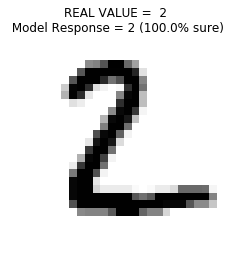

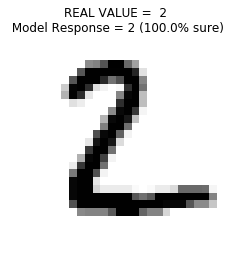

In [16]:
# This loop quickly displays the 2D 28 x 28 pixels training images, along with their Y labels
for i in range(2):#range(len(y_test))
    
    test_IMG    = x_test[i:i+1,:,:]
    # here we run an individual image through our trained model
    # to produce the output probabilities.
    num_probs   = model.predict(test_IMG)
  
    predic_val  = np.argmax(num_probs)
    predic_prob = num_probs.max()
    
    plt.clf()
    plt.imshow(np.squeeze(test_IMG),cmap='binary')
    plt.axis('off')
    plt.title('REAL VALUE =  {}\n Model Response = {} ({:.1f}% sure)'.format(y_test[i]\
                                                                             ,predic_val,predic_prob*100) )
    time.sleep(5)
    display.clear_output(wait=True)
    display.display(plt.gcf())    
    